* Ссылки 
  * [Гайд по SNS](https://nagornyy.me/courses/data-science/intro-to-seaborn/).<br>
  * [Построение графиков](https://pcnews.ru/blogs/spargalka_po_vizualizacii_dannyh_v_python_s_pomosu_plotly-986119.html).<br>
  * [Продвинутая визуализация](https://habr.com/ru/company/skillfactory/blog/510320/).<br>

In [1]:
from pylab import rcParams
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import numpy as np
import pandas as pd
import plotly
from IPython.display import Image
import matplotlib
from IPython.core.interactiveshell import InteractiveShell
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 16, 10
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 8)
init_notebook_mode(connected=True)
pd.options.display.float_format = '{:,.1f}'.format
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv('df.csv')

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('precision', 2)

In [3]:
# Преобразуем числовые данные в объектные
df['RIAGENDR'] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
df['DMDEDUC2'] = df.DMDEDUC2.replace(
    {1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})
df['DMDMARTL'] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced",
                                      4: "Separated", 5: "Never married", 6: "Living w/partner", 77: "Refused"})

In [4]:
# Добавим новый столбец, с массой тела, умноженной на 10
df["dot_size"] = df.BMXBMI*10

In [5]:
# Уменьшим фрейм
df = df.loc[:500, :]
df.shape

(501, 29)

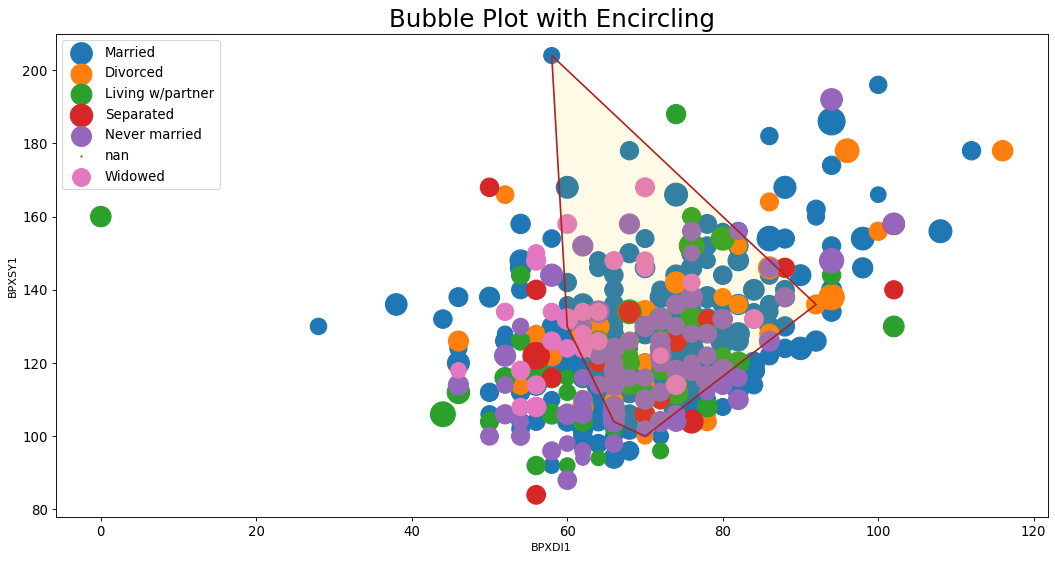

In [6]:
# Диаграмма рассеяния
from scipy.spatial import ConvexHull

# Функция, которая добавляет в график очерченную область, где переменные предикторов соответствуют определенному критерию
from scipy.spatial import ConvexHull
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

category = df['DMDMARTL'].unique()

plt.figure(figsize=(16, 8), dpi=80, facecolor="w", edgecolor="k")
for i, cat in enumerate(category):
    plt.scatter("BPXDI1", "BPXSY1",  # X Y
                # В каждом цикле проходим по одному значению переменных из колонки
                data=df.loc[df.DMDMARTL == cat, :],
                s='dot_size',  # ЗАвисимость размера точки от значения в другой колонке фрейма
                label=str(cat))

# Задаем целевой предиктор
df_encircle = df.loc[(df["RIDAGEYR"] > 40), :].dropna()
# Ограничиваем область и делаем ей заливку
encircle(df_encircle.BPXDI1, df_encircle.BPXSY1, ec="k", fc="gold", alpha=0.1)
encircle(df_encircle.BPXDI1, df_encircle.BPXSY1,
         ec="firebrick", fc="none", linewidth=1.5)

plt.gca().set(xlabel='BPXDI1', ylabel='BPXSY1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show();

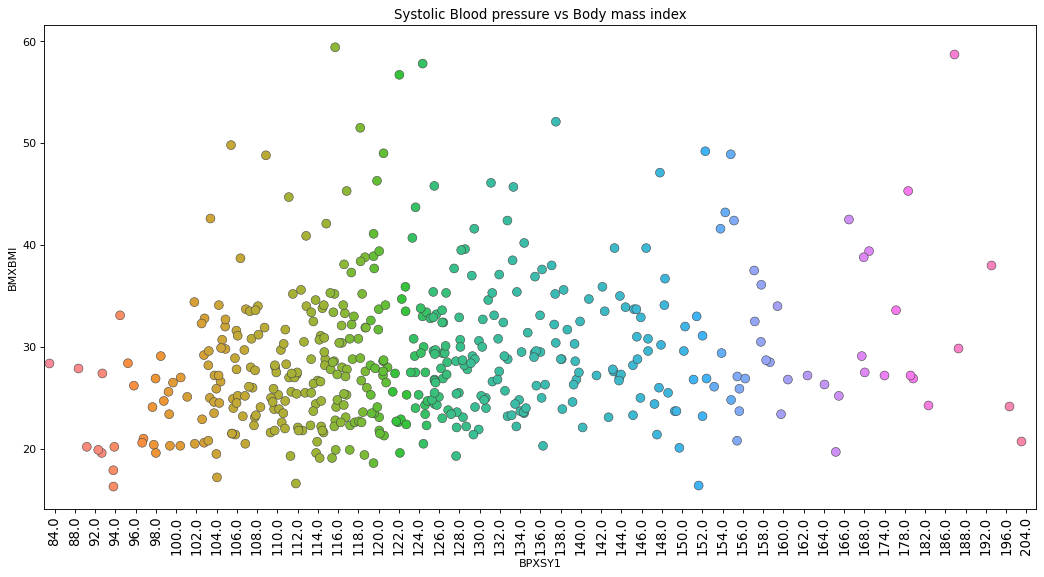

In [7]:
# точечная диаграмма
fig, ax = plt.subplots(figsize=(16, 8), dpi=80)
sns.stripplot(df.BPXSY1, df.BMXBMI, jitter=0.45, size=8, ax=ax, linewidth=0.5)
plt.title("Systolic Blood pressure vs Body mass index")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=90)
plt.show();

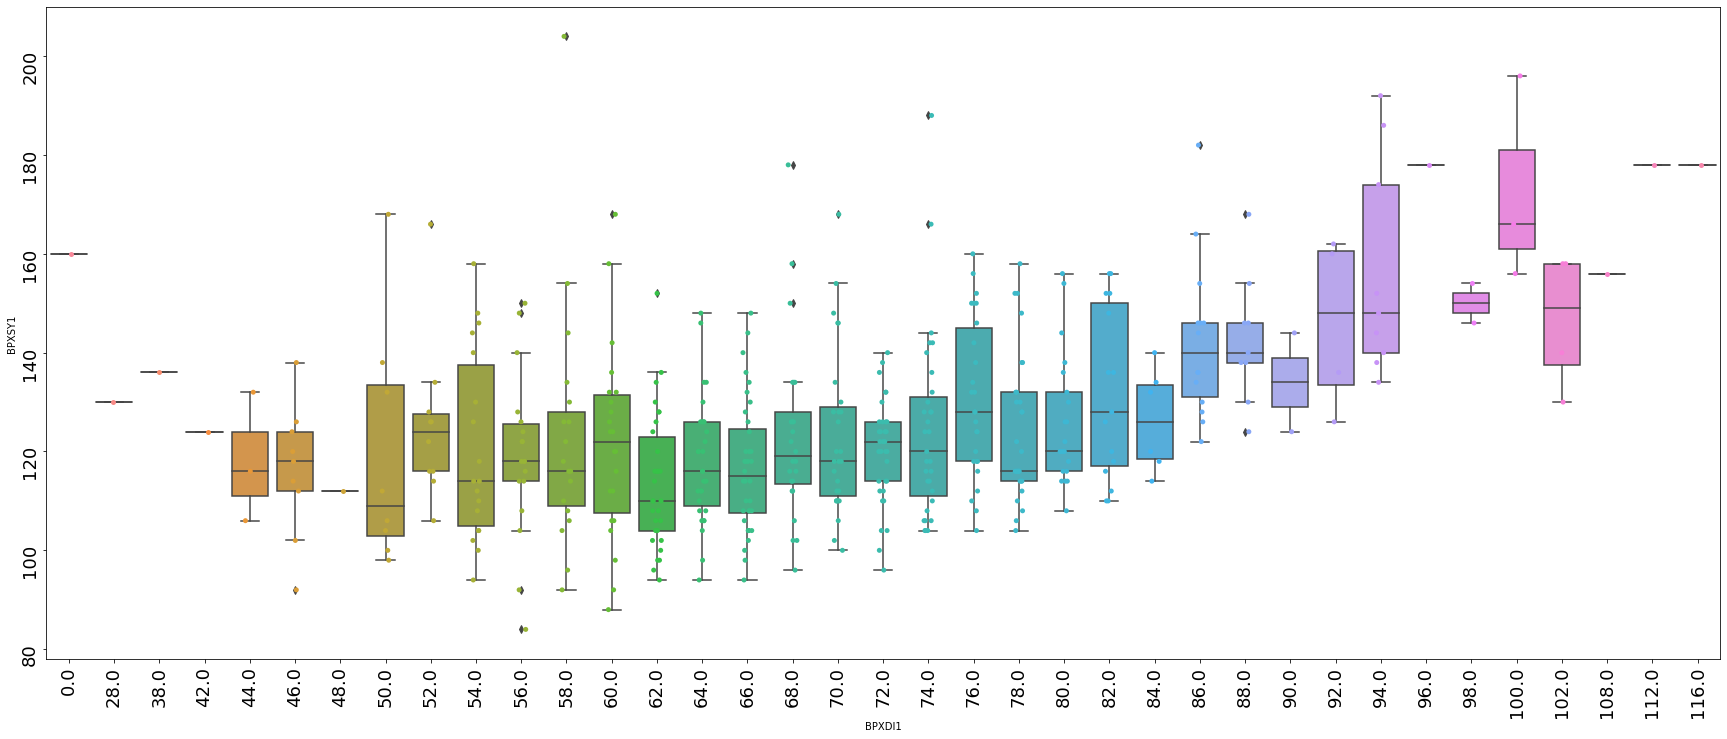

In [8]:
# Точечные диаграммы с ящиками помогают когда данных очень много
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.boxplot(x="BPXDI1", y = "BPXSY1", data=df)
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot(x = "BPXDI1", y = "BPXSY1", data=df)

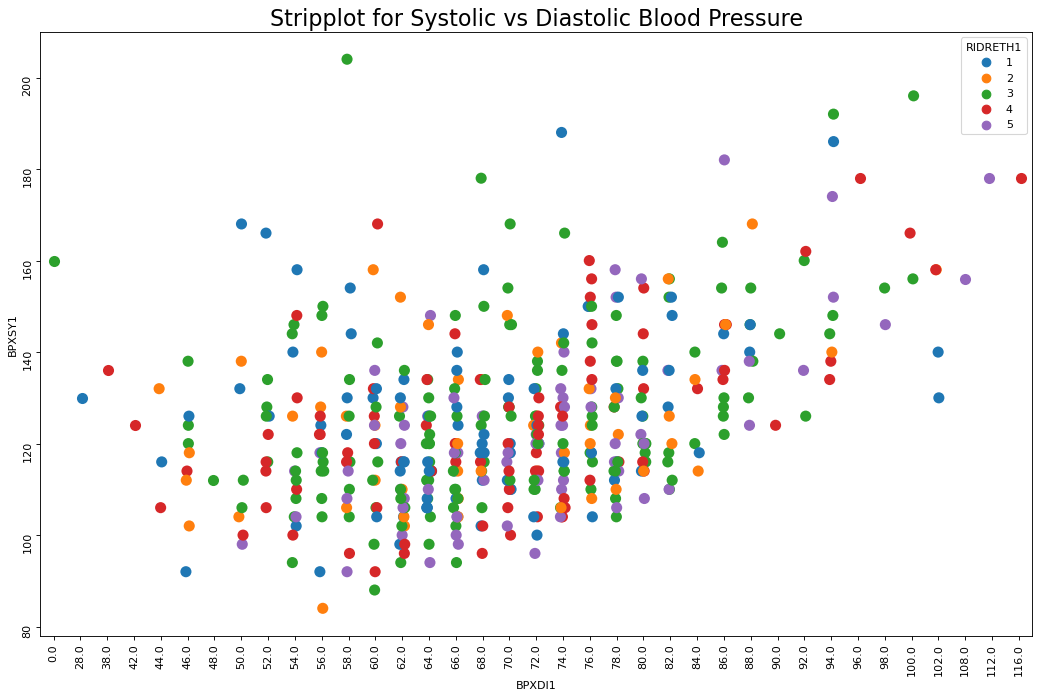

In [9]:
# Точечная диаграмма, разделенная по дополнительному предиктору (hue)
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.BPXDI1, df.BPXSY1, s=10, hue = df.RIDRETH1, ax=ax)
plt.title("Stripplot for Systolic vs Diastolic Blood Pressure", fontsize=20)
plt.tick_params(rotation=90)
plt.show();

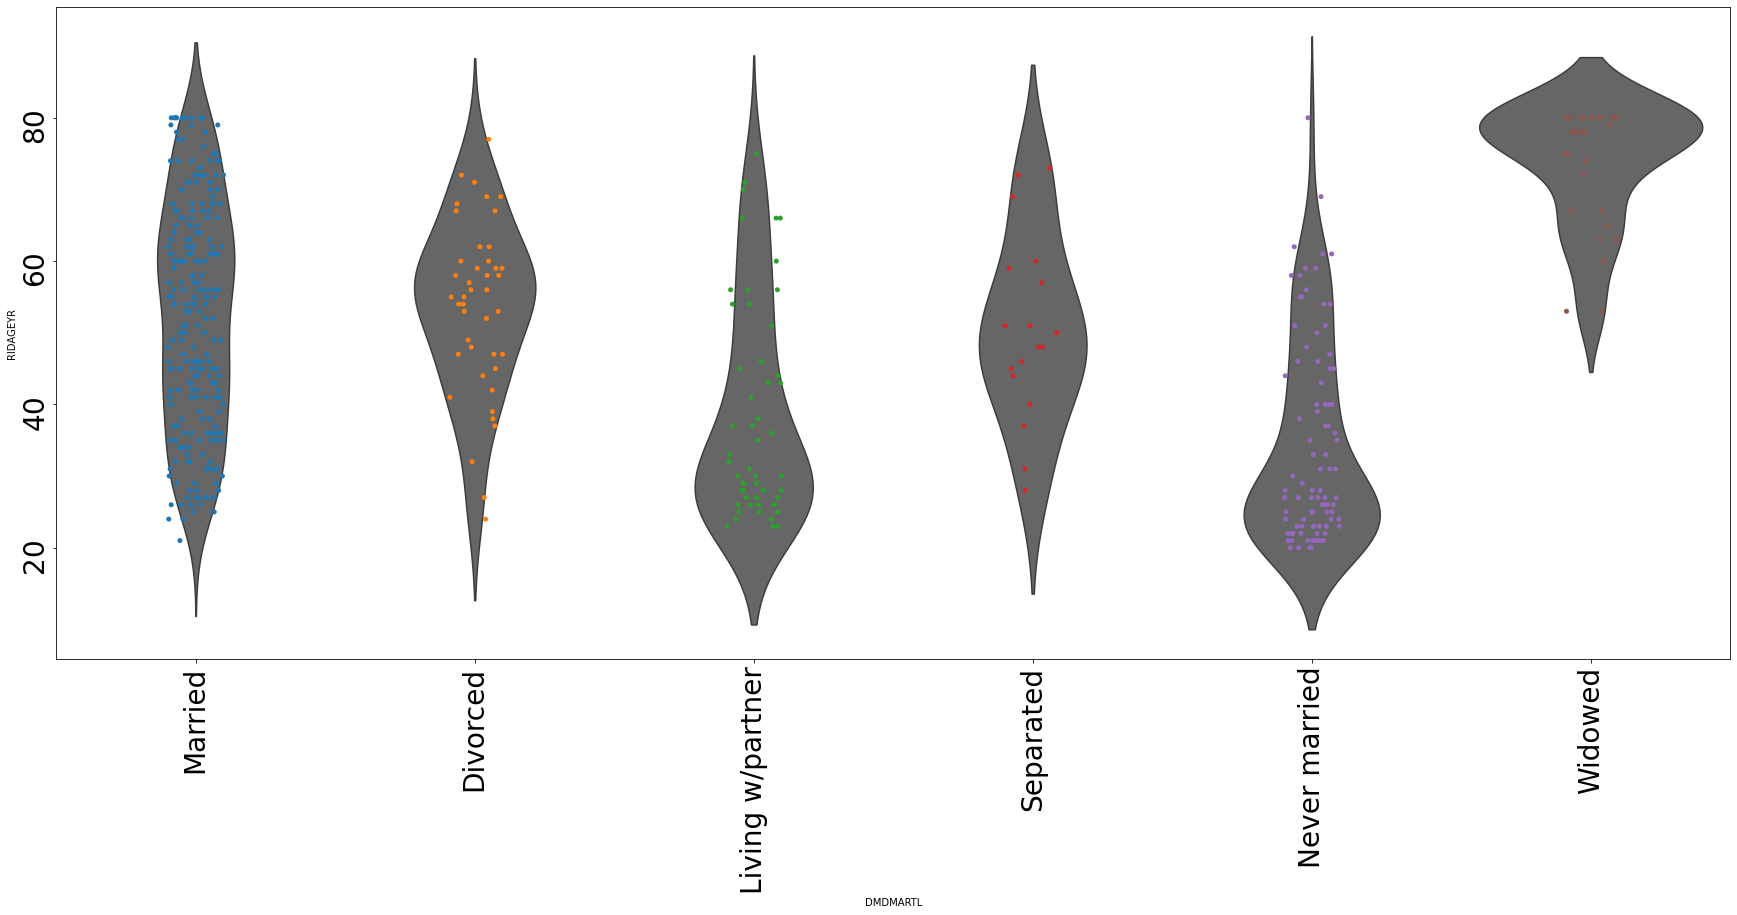

In [10]:
#Скрипичная дияграмма
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.violinplot(x= "DMDMARTL", y="RIDAGEYR", data=df, inner=None, color="0.4")
ax = sns.stripplot(x= "DMDMARTL", y="RIDAGEYR", data=df)
ax.tick_params(rotation=90, labelsize=28)

<AxesSubplot:xlabel='DMDMARTL', ylabel='BPXDI1'>

<AxesSubplot:xlabel='DMDMARTL', ylabel='BPXDI1'>

(array([  1.,   0.,   1.,  14.,  55., 162., 169.,  50.,  19.,   3.]),
 array([  0. ,  11.6,  23.2,  34.8,  46.4,  58. ,  69.6,  81.2,  92.8,
        104.4, 116. ]),
 [<matplotlib.patches.Polygon at 0x26ff1623910>])

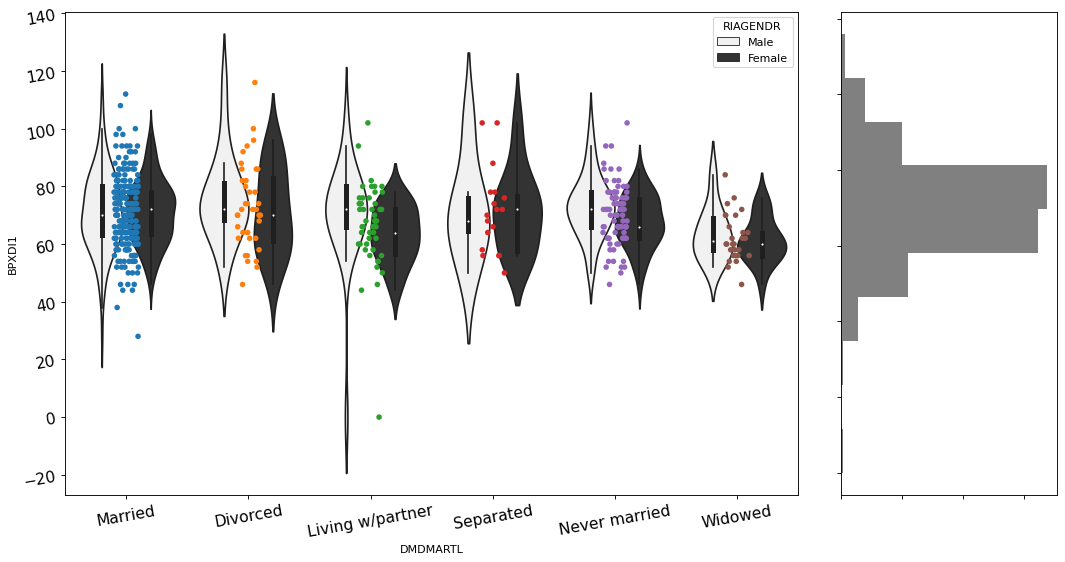

In [11]:
# Скрипичная диаграмма зависимости отклика от предиктора, с разделением по второму предиктору (hue) 
fig = plt.figure(figsize=(16, 8), dpi=80)

# Добавление второго графика, справа
grid=plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:, :-1])
ax_right = fig.add_subplot(grid[:, -1], xticklabels=[], yticklabels=[])

sns.violinplot(x= "DMDMARTL", y = "BPXDI1", hue = "RIAGENDR", data = df, color= "0.2", ax=ax_main)
sns.stripplot(x= "DMDMARTL", y = "BPXDI1", data = df, ax=ax_main)

ax_right.hist(df.BPXDI1, histtype='stepfilled', orientation='horizontal', color='grey')
ax_main.title.set_fontsize(14)
ax_main.tick_params(rotation=10, labelsize=14)

plt.show()

Text(0.5, 1.0, 'Height vs weight with line of best fit grouped by Gender')

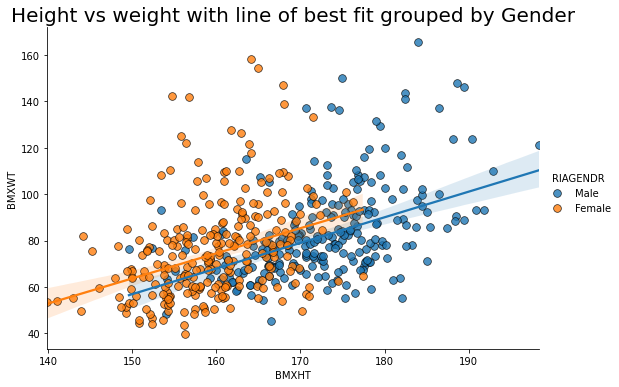

In [12]:
# Диаграммы с линией линейной регрессии. Зависимость отклика от предиктора, разделенных по доп. предиктору

g = sns.lmplot(x='BMXHT', y='BMXWT', hue='RIAGENDR', data=df,
               aspect=1.5, robust=True, palette='tab10',
               scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Height vs weight with line of best fit grouped by Gender", fontsize=20)
plt.show()

(array([130., 140., 150., 160., 170., 180., 190., 200.]),
 [Text(130.0, 0, '130'),
  Text(140.0, 0, '140'),
  Text(150.0, 0, '150'),
  Text(160.0, 0, '160'),
  Text(170.0, 0, '170'),
  Text(180.0, 0, '180'),
  Text(190.0, 0, '190'),
  Text(200.0, 0, '200')])

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]), [])

<Figure size 1600x640 with 0 Axes>

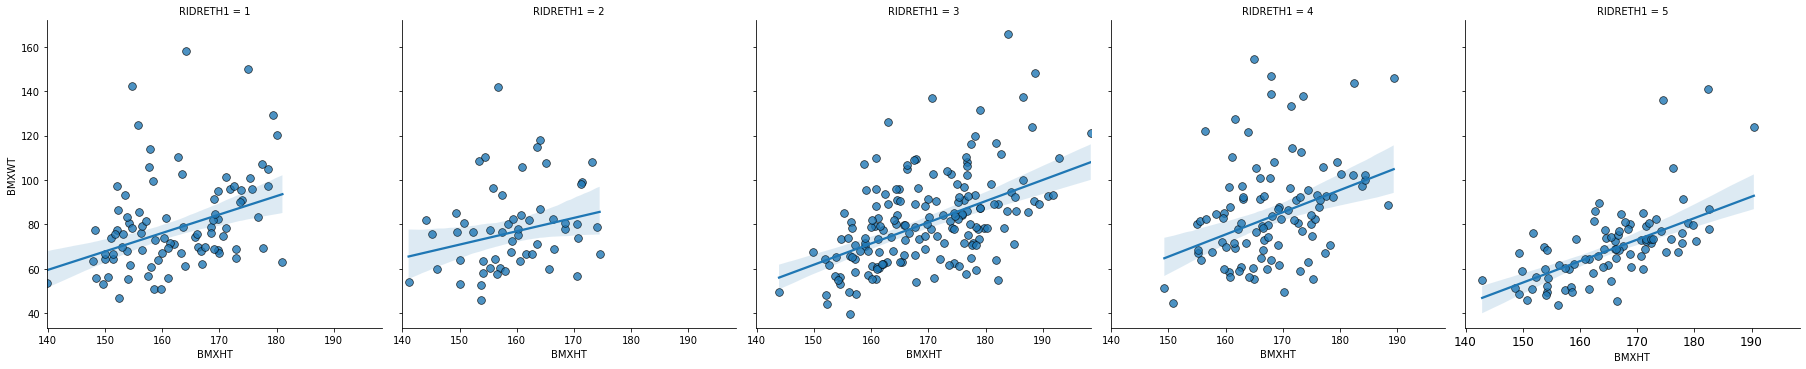

In [13]:
# Индивидуальные диаграммы с линией регрессии. Отклик и предиктор с доп. графиками для второго предиктора

fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='BMXHT', y='BMXWT', data = df, robust = True,
              palette="Set1", col="RIDRETH1", # Указываем на разделение на колонки по параметрам в доп. предикторе
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
plt.xticks(fontsize=12, )
plt.yticks(fontsize=12)
plt.show()

<Figure size 800x640 with 0 Axes>

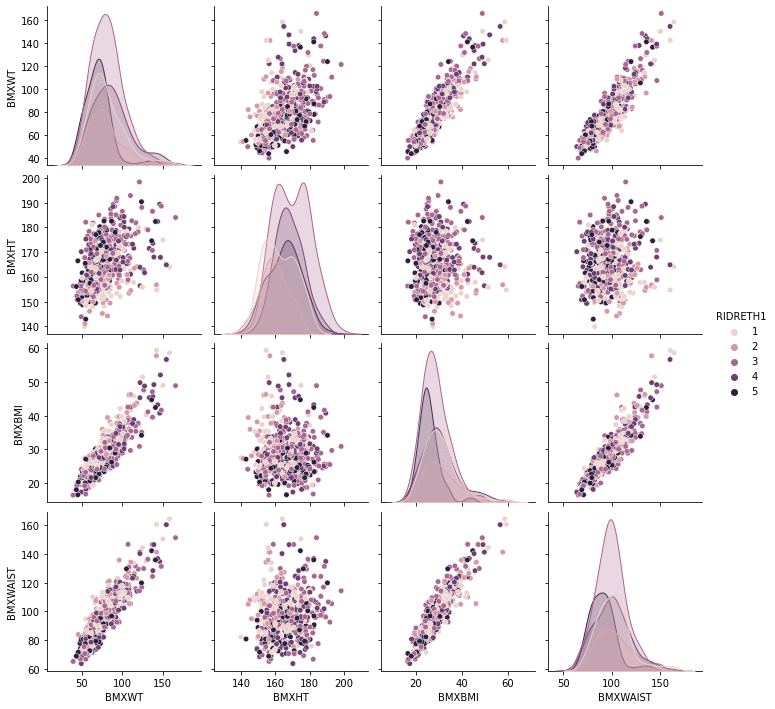

In [14]:
# Парные диаграммы для EDA.Взаимозависимости 4 пар предикторов, разделенных по пятому
plt.figure(figsize=(10,8), dpi= 80)
sns.color_palette("hls", 8)
sns.pairplot(df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', "RIDRETH1"]], kind="scatter", hue="RIDRETH1", plot_kws=dict(s=30))
plt.show();

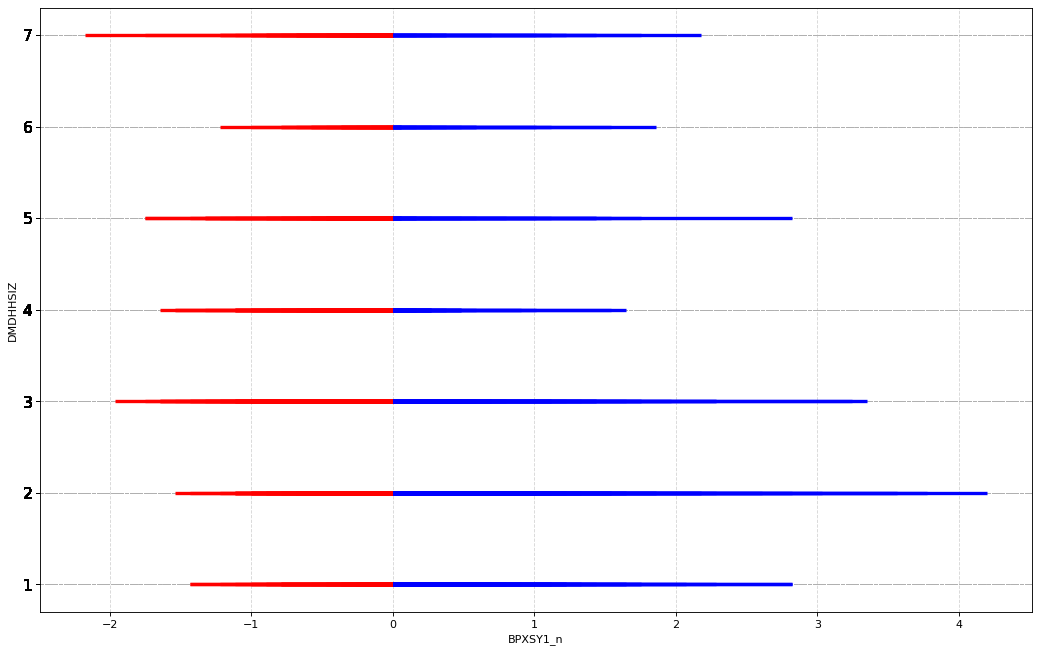

In [15]:
# Расходящиеся столбики

x = df.loc[:, "BPXSY1"]
df["BPXSY1_n"] = (x - x.mean())/x.std() #Стандартизируем данные
df['colors'] = ['red' if i < 0 else 'blue' for i in df["BPXSY1_n"]] #Задаем цвета для положительных и отрицательных значений
df.sort_values("BPXSY1_n", inplace=True)
df.reset_index(inplace=True)
plt.figure(figsize=(16, 10), dpi=80)
plt.hlines(y = df.DMDHHSIZ, xmin=0, xmax = df.BPXSY1_n, color=df.colors, linewidth=3) #Центрируем по стандартизированным 
plt.gca().set(ylabel="DMDHHSIZ", xlabel = "BPXSY1_n")
plt.yticks(df.DMDHHSIZ, fontsize=14)
plt.grid(linestyle='--', alpha=0.5)
plt.show();

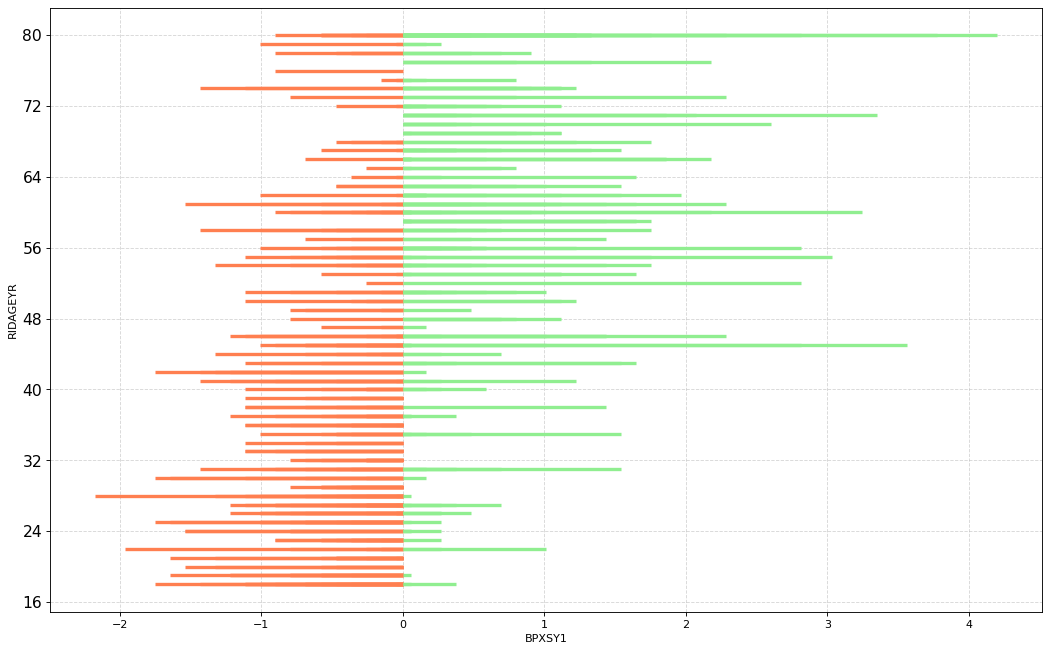

In [16]:
# Расходящиеся столбики
x = df.loc[:, "BPXSY1"]
df['colors'] = ['coral' if i < 0 else 'lightgreen' for i in df["BPXSY1_n"]]
y_ticks = np.arange(16, 82, 8) #Задаем шкалу для оси Y. старт, стоп, шаг
plt.figure(figsize=(16, 10), dpi=80)
plt.hlines(y = df.RIDAGEYR, xmin=0, xmax = df.BPXSY1_n, color=df.colors, linewidth=3)
plt.gca().set(ylabel="RIDAGEYR", xlabel = "BPXSY1")
plt.yticks(y_ticks, fontsize=14)
plt.grid(linestyle='--', alpha=0.5)
plt.show();

In [17]:
df.head().T

,0,1,2,3,4
index,389,430,73,419,413
SEQN,84410,84473,83871,84456,84450
ALQ101,2.0,1.0,2.0,2.0,2.0
ALQ110,2.0,NaN,2.0,2.0,2.0
ALQ130,NaN,1.0,NaN,NaN,NaN
SMQ020,2,1,2,2,2
RIAGENDR,Female,Female,Female,Female,Female
RIDAGEYR,28,22,30,42,18
RIDRETH1,2,3,1,5,1
DMDCITZN,2.0,1.0,2.0,1.0,1.0


In [18]:
df['Age'] = df['RIDAGEYR']
df['Gender'] = df['RIAGENDR']
df['Salary'] = df['WTINT2YR']

In [19]:
df[df['Gender'] == 'Male']['Salary'].agg(np.median) 
df[(df['Gender'] == 'Male') & (df['DMDMARTL'] != 'Married')]['Salary'].agg(np.median)

25558.45

28034.78

In [20]:
# средние показатели предикторов, сгруппированных для другого
df.groupby(['Gender'])[['SDMVSTRA', 'Age', 'Salary']].agg(np.median)

,SDMVSTRA,Age,Salary
Gender,,,
Female,126,45,"26,075.1"
Male,126,50,"25,558.5"


In [21]:
# Выделение нового предиктора на основе произвольных действий с другими
df['Rich'] = (df['Salary'] > df['Salary'].quantile(.75)).astype(int) #Верхняя четверть богатых

In [22]:
def binar_gender(gender):
    return 0 if gender == "Female" else 1
df['Gender'].apply(binar_gender).describe()

count   501.0
mean      0.5
std       0.5
min       0.0
25%       0.0
50%       0.0
75%       1.0
max       1.0
Name: Gender, dtype: float64

In [23]:
num_feat = [x for x in df.columns if df[x].dtype !="object"]
df[num_feat].apply(np.mean)

index         250.0
SEQN       84,167.0
ALQ101          1.3
ALQ110          1.6
ALQ130          2.8
SMQ020          1.6
RIDAGEYR       47.5
RIDRETH1        3.0
DMDCITZN        1.2
DMDHHSIZ        3.3
WTINT2YR   42,080.7
SDMVPSU         1.5
SDMVSTRA      126.2
INDFMPIR        2.4
BPXSY1        124.9
BPXDI1         69.5
BPXSY2        124.6
BPXDI2         69.1
BMXWT          80.2
BMXHT         166.2
BMXBMI         29.0
BMXLEG         38.6
BMXARML        37.0
BMXARMC        32.8
BMXWAIST       98.7
HIQ210          1.9
dot_size      289.7
BPXSY1_n       -0.0
Age            47.5
Salary     42,080.7
Rich            0.2
dtype: float64

In [24]:
df.sort_values('Age', ascending=False)

,index,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,dot_size,BPXSY1_n,colors,Age,Gender,Salary,Rich
418,226,84115,2.0,1.0,nan,1,Male,80,5,1.0,HS/GED,Married,2,"17,156.0",2,132,nan,148.0,64.0,142.0,66.0,68.7,164.2,25.5,39.6,39.6,31.2,101.7,2.0,255.0,1.2,lightgreen,80,Male,"17,156.0",0
466,111,83932,2.0,1.0,1.0,2,Female,80,3,1.0,Some college/AA,Married,2,"47,792.4",1,130,3.1,178.0,68.0,186.0,70.0,65.7,156.3,26.9,30.7,35.9,30.5,94.0,2.0,269.0,2.8,lightgreen,80,Female,"47,792.4",1
362,235,84129,1.0,nan,4.0,1,Male,80,5,1.0,<9,Married,2,"17,791.5",2,132,0.8,136.0,60.0,130.0,56.0,48.2,154.0,20.3,35.5,34.5,26.2,77.9,1.0,203.0,0.6,lightgreen,80,Male,"17,791.5",0
80,345,84336,2.0,2.0,nan,2,Female,80,3,1.0,College,Widowed,1,"43,783.4",1,126,2.1,108.0,54.0,104.0,56.0,56.9,153.7,24.1,nan,34.8,25.2,86.0,2.0,241.0,-0.9,coral,80,Female,"43,783.4",0
278,258,84178,1.0,nan,1.0,1,Male,80,3,1.0,9-11,Married,6,"26,833.6",2,132,2.4,126.0,52.0,110.0,54.0,90.2,175.2,29.4,43.2,42.3,30.3,115.5,2.0,294.0,0.1,lightgreen,80,Male,"26,833.6",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,172,84025,1.0,nan,1.0,2,Female,18,3,1.0,NaN,NaN,7,"41,690.8",2,127,1.2,112.0,48.0,104.0,50.0,96.2,168.2,34.0,41.4,36.8,37.6,92.7,2.0,340.0,-0.7,coral,18,Female,"41,690.8",0
4,413,84450,2.0,2.0,nan,2,Female,18,1,1.0,NaN,NaN,3,"14,700.0",2,125,1.0,92.0,46.0,92.0,48.0,50.7,159.7,19.9,37.0,35.1,23.8,73.5,2.0,199.0,-1.7,coral,18,Female,"14,700.0",0
85,487,84580,1.0,nan,4.0,2,Male,18,5,1.0,NaN,NaN,3,"10,364.0",2,128,nan,108.0,58.0,112.0,52.0,86.9,182.5,26.1,47.2,40.4,32.7,96.9,2.0,261.0,-0.9,coral,18,Male,"10,364.0",0
110,375,84391,2.0,2.0,nan,2,Male,18,3,1.0,NaN,NaN,3,"89,924.8",1,130,4.6,112.0,60.0,114.0,58.0,55.1,182.1,16.6,45.1,39.7,24.0,67.0,2.0,166.0,-0.7,coral,18,Male,"89,924.8",1


In [25]:
pd.crosstab(df['Gender'], df['Rich'], normalize=True)

Rich,0,1
Gender,,
Female,0.4,0.1
Male,0.4,0.1


In [26]:
df.pivot_table(['Age', 'Salary'], ['Gender'], aggfunc='median')

,Age,Salary
Gender,,
Female,45,"26,075.1"
Male,50,"25,558.5"


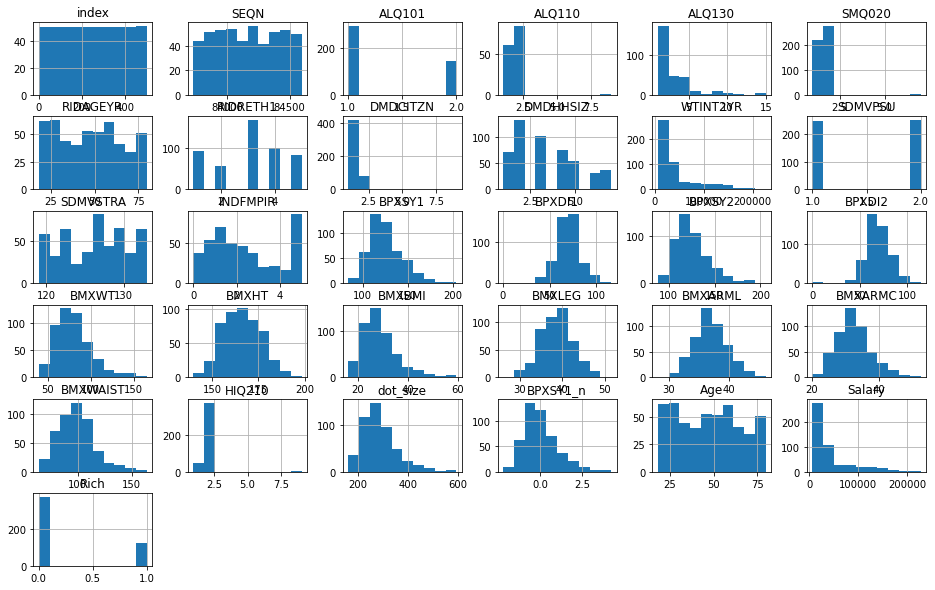

In [29]:
df.hist();

In [36]:
# Выборка для всего фрейма, ограниченная по заданным параметрам одного из предикторов(например, только топ-5 значений)
a = df[df['Age'].isin(df['Age'].value_counts().head().index)]

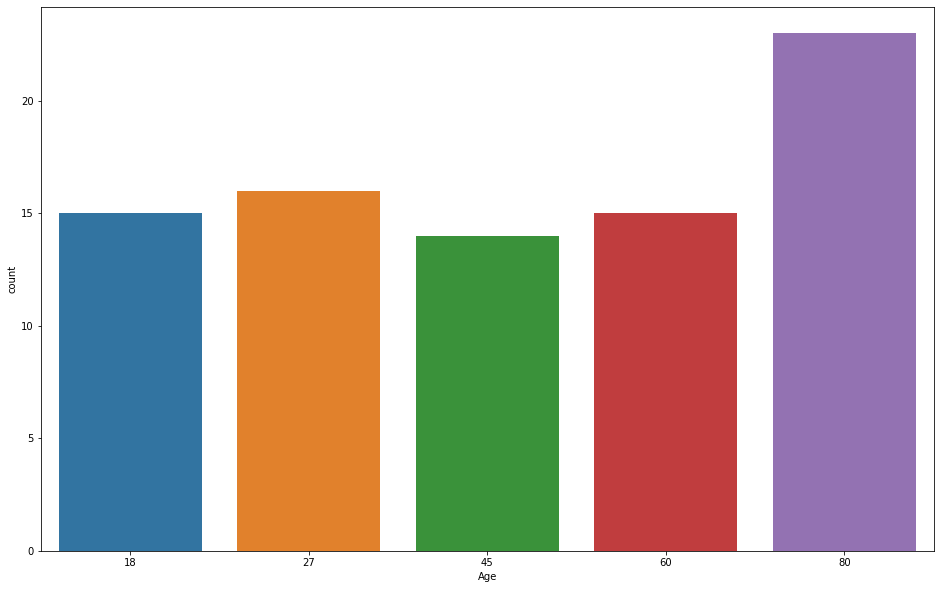

In [37]:
sns.countplot(a['Age']);